# Implement this analysis in the Vorticity field 4 EKE.

Try removing the ssha contour from this velocity field and the other one.

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
import seawater as sw

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import velocity fields values to python environment.

ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
ssh=ncfile.variables['eta_t'][0,:,:]
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])
mask=ma.getmask(ssh[:,:])


In [4]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:]/100)
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

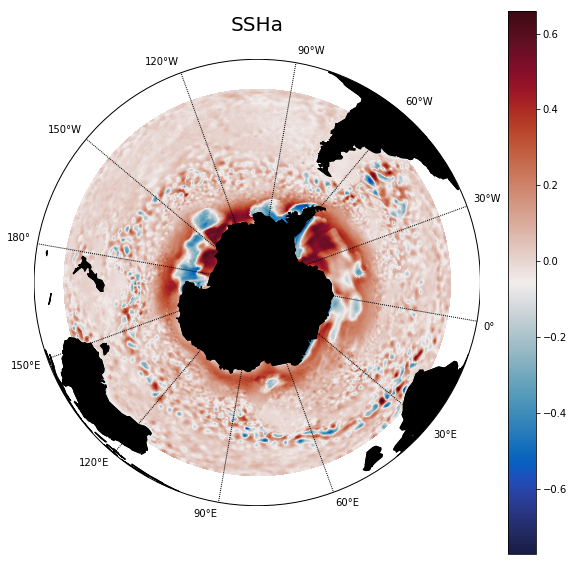

In [5]:
basemap_mplot(lon,lat,ssh-ssh_mean,title="SSHa",scale='Lin',cmap=cm.cm.balance,\
              vmin='',vmax='',xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

# Check this calculation

Geostrophic velocities:

$$u=-\frac{g}{f}\frac{d\eta}{dy}$$
$$v=\frac{g}{f}\frac{d\eta}{dx}$$

In [6]:
u_g,v_g=geovelfield(ssh,lon,lat,mask)

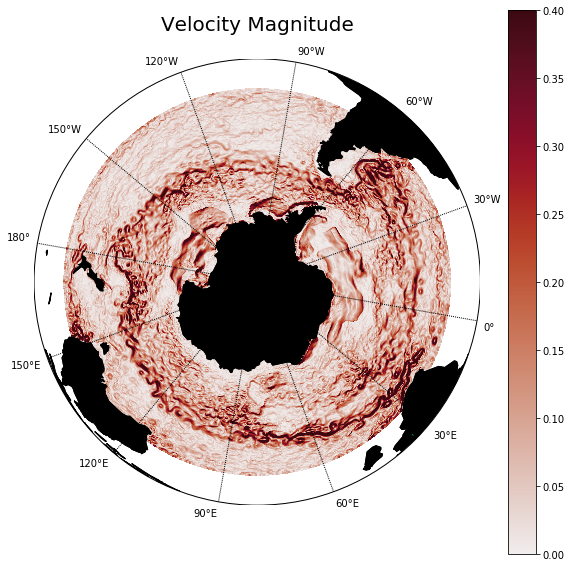

In [7]:
basemap_mplot(lon,lat,sqrt(u_g**2+v_g**2),title="Velocity Magnitude",scale='Lin',cmap=cm.cm.amp,\
              vmin=0,vmax=0.4,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

# Check Vorticity and all the others calculations.

In [8]:
w=vorticity2D(u_g,v_g,lon,lat)

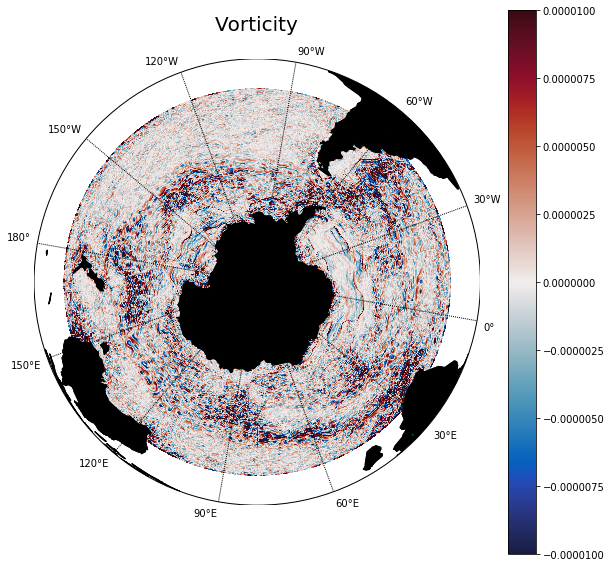

In [9]:
basemap_mplot(lon,lat,w,title="Vorticity",scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.00001,vmax=0.00001,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()
# EkE=0.5 * (u_avg**2 + v_avg**2)

In [10]:
eddytd=analyseddyzt(w,lon,lat,0,1,1,0.00004,0.00001,0.00001,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

If you whant to analyze in time the data need to be 3d [i.e. data(t,x,y)]
Be sure the data is an anomaly
 0% [>]100% Time Elapsed: 24 s  

In [11]:
threshold=1
eddysplot=exeddy(eddytd,lat,lon,w,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


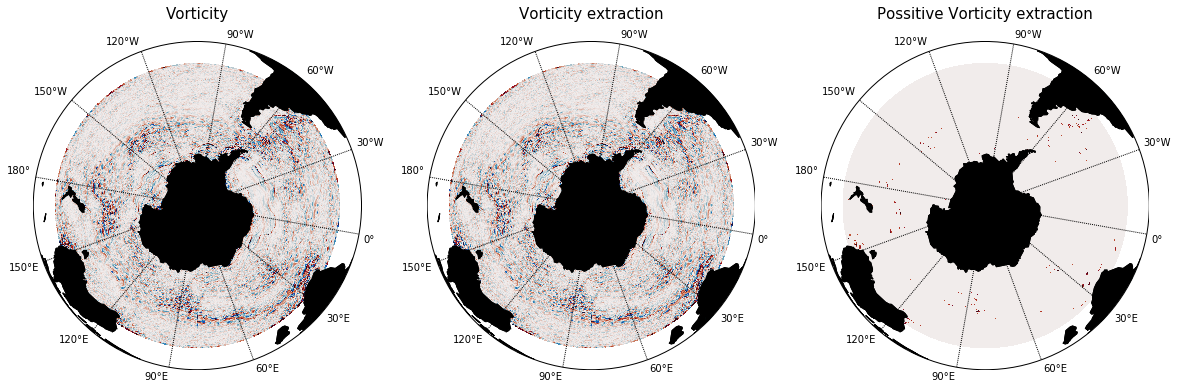

In [12]:
basemap_mplot(lon,lat,[w,w-eddysplot,eddysplot]\
              ,title=["Vorticity","Vorticity extraction","Possitive Vorticity extraction"],scale='Lin',\
              cmap=cm.cm.balance,vmin=-0.00002,vmax=0.00002,xan=1,yan=3,figsize=(20,20),fontsize=15);

In [13]:
eddytdn=analyseddyzt(w,lon,lat,0,1,1,-0.00004,-0.00001,-0.00001,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

If you whant to analyze in time the data need to be 3d [i.e. data(t,x,y)]
Be sure the data is an anomaly
 0% [>]100% Time Elapsed: 31 s  

In [14]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,w,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


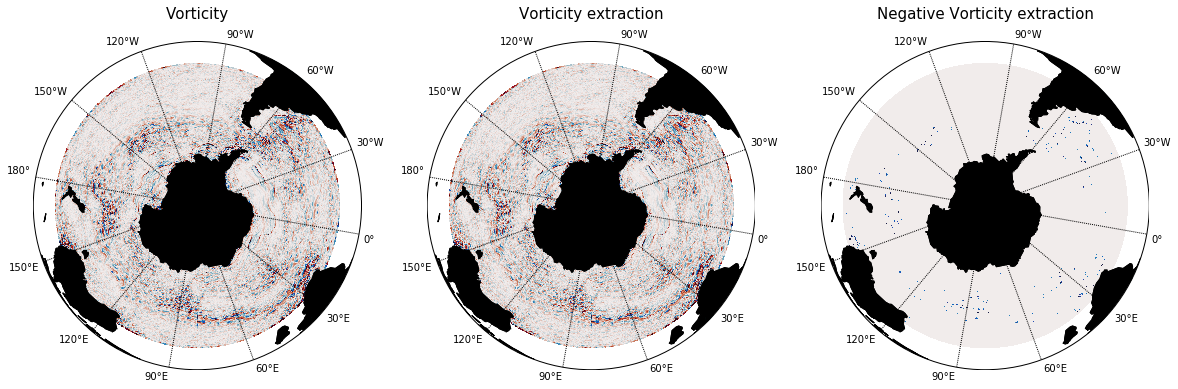

In [15]:
basemap_mplot(lon,lat,[w,w-eddysplotn,eddysplotn]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.00002,vmax=0.00002,xan=1,yan=3,figsize=(20,20),fontsize=15);

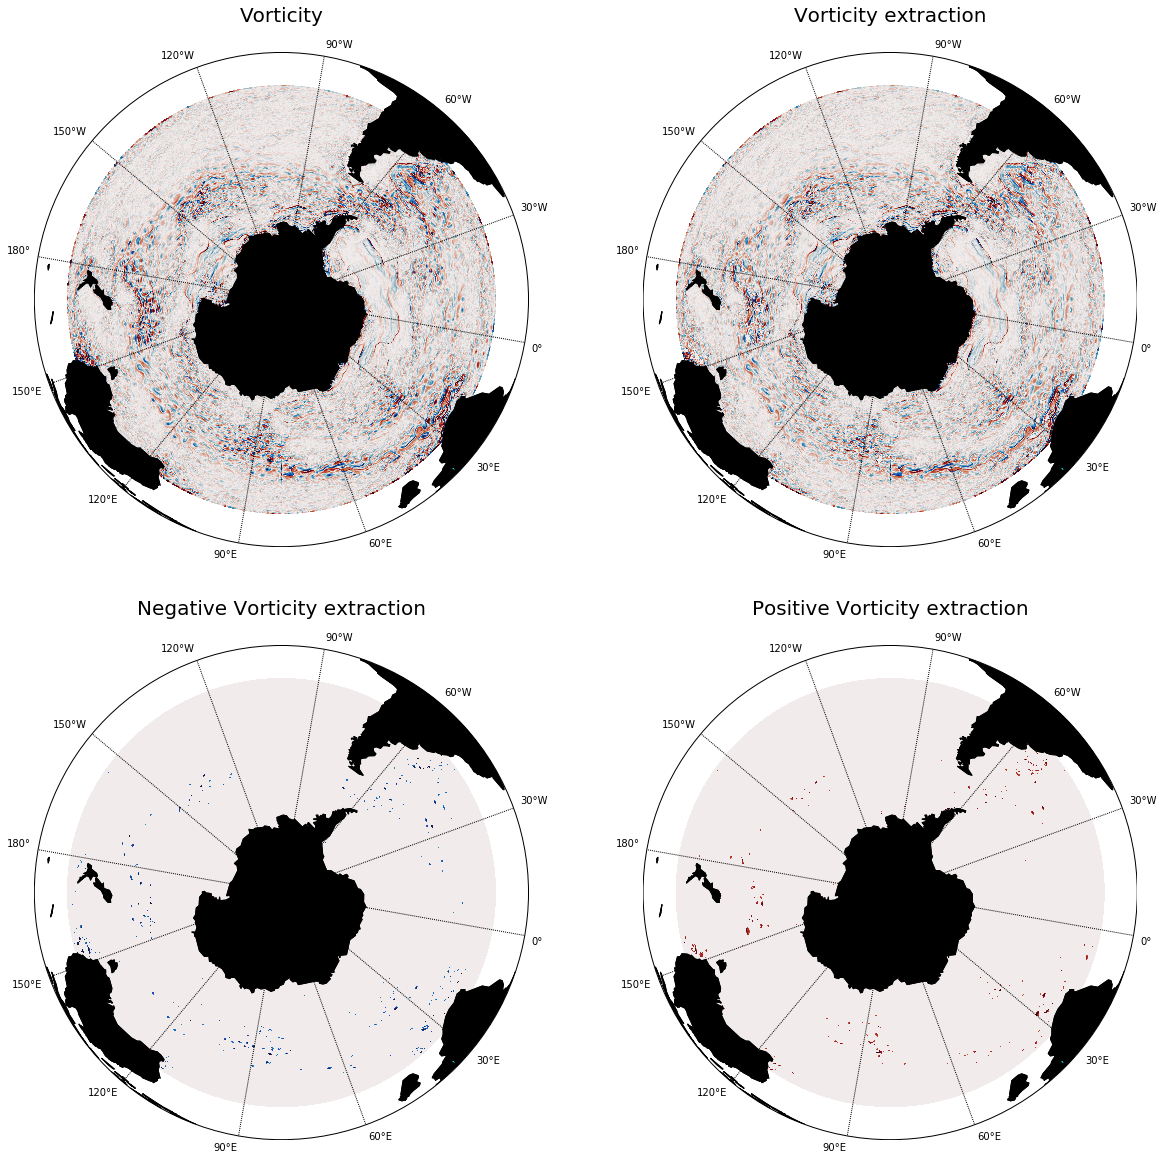

In [16]:
basemap_mplot(lon,lat,[w,w-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction",\
                       "Positive Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.00002,vmax=0.00002,xan=2,yan=2,figsize=(20,20),fontsize=20);

In [17]:
threshold=3
eddysup=exeddy(eddytd,lat,lon,u_g,0,threshold,inside=w,diagnostics=False)
eddysun=exeddy(eddytdn,lat,lon,u_g,0,threshold,inside=w,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


In [18]:
threshold=3
eddysvp=exeddy(eddytd,lat,lon,v_g,0,threshold,inside=w,diagnostics=False)
eddysvn=exeddy(eddytdn,lat,lon,v_g,0,threshold,inside=w,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


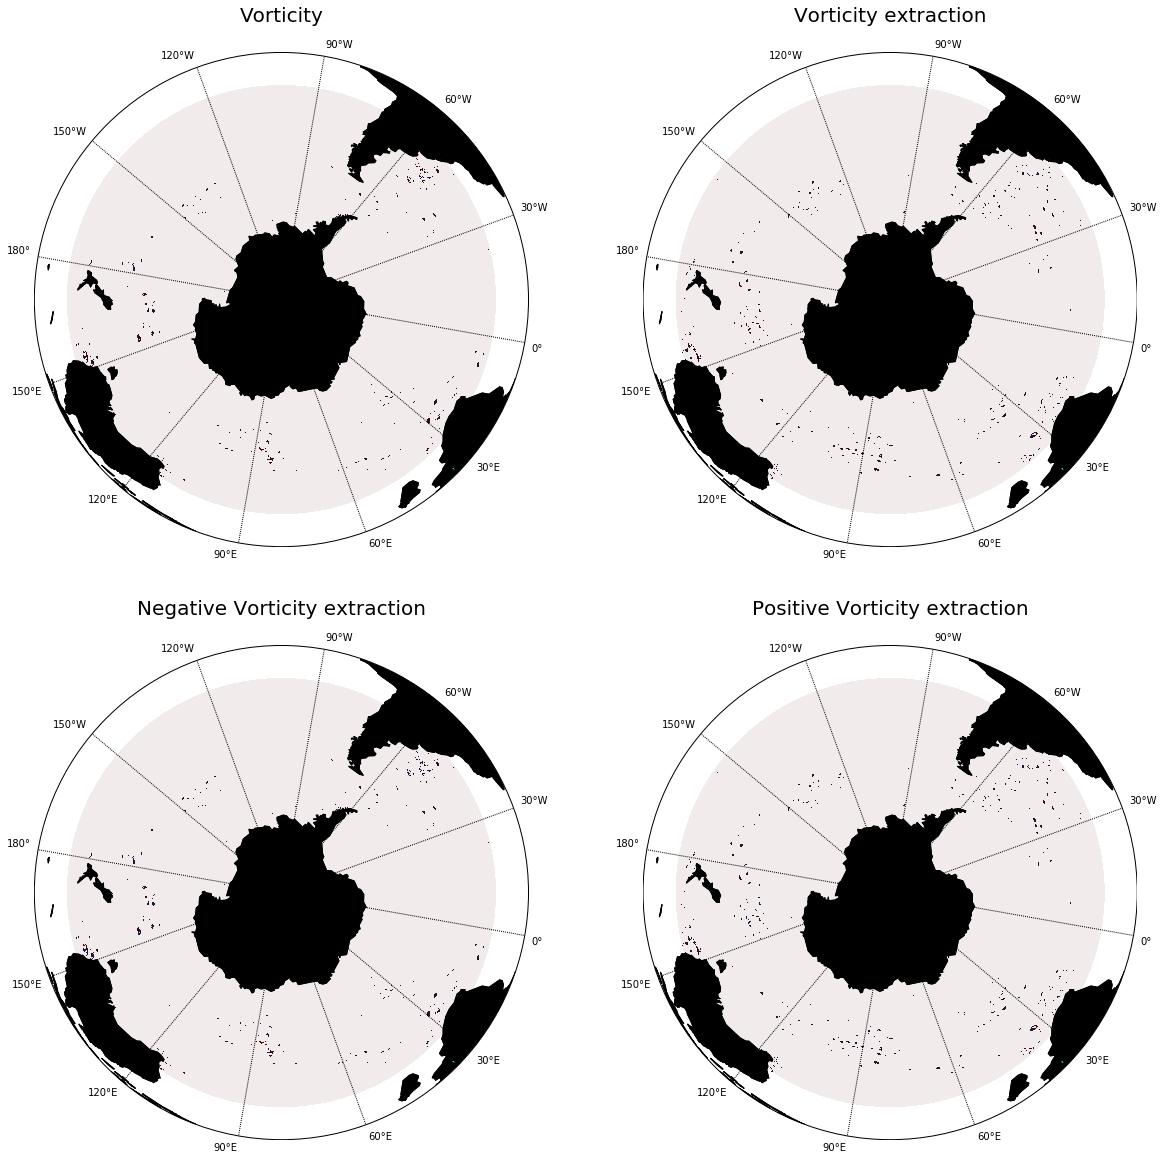

In [19]:
basemap_mplot(lon,lat,[eddysup,eddysun,eddysvp,eddysvn]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction",\
                       "Positive Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.00002,vmax=0.00002,xan=2,yan=2,figsize=(20,20),fontsize=20);

# EKE

In [20]:
eddyu=(eddysun+eddysup)
eddyv=(eddysvn+eddysvp)

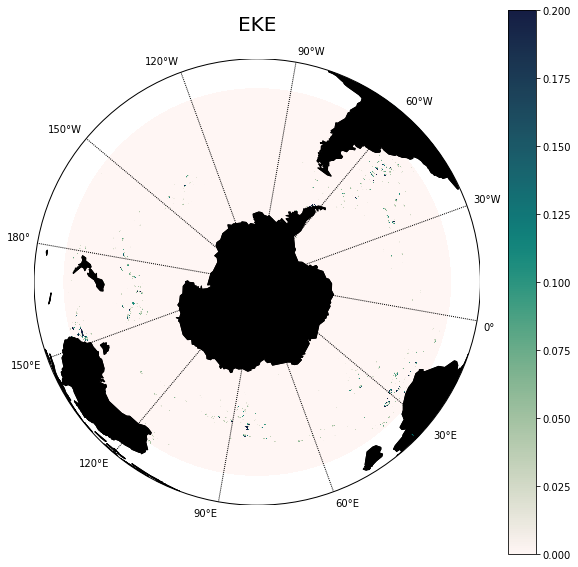

In [21]:
eke=KE(eddyu,eddyv)

basemap_mplot(lon,lat,eke,title="EKE",scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

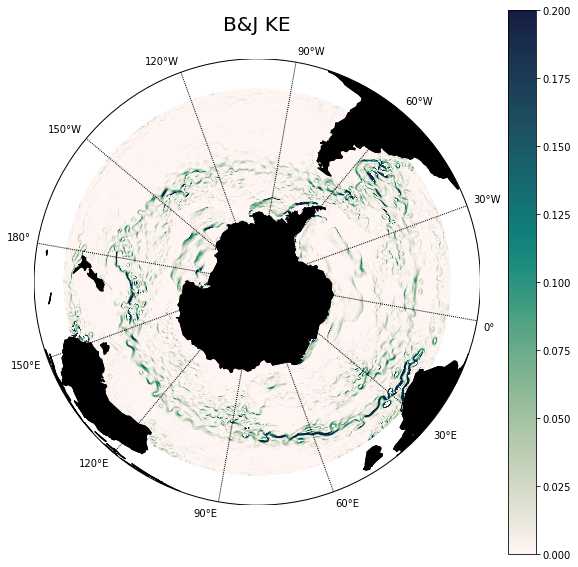

In [22]:
bjke=KE(u_g-eddyu,v_g-eddyv)
basemap_mplot(lon,lat,bjke,title="B&J KE",scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

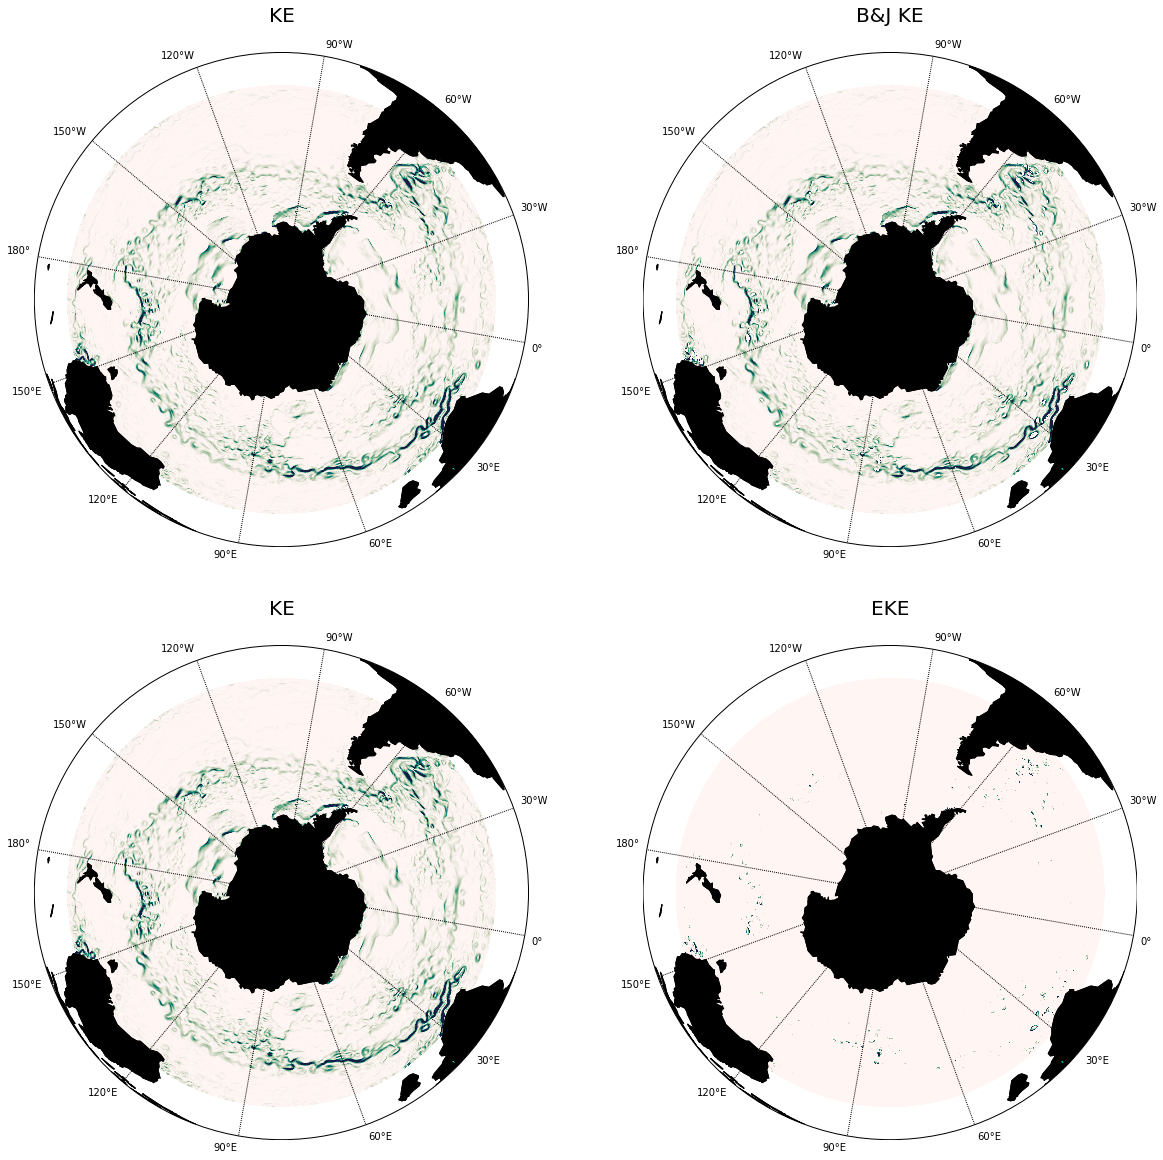

In [23]:
ke=KE(u_g,v_g)
basemap_mplot(lon,lat,[ke,bjke,ke,eke]\
              ,title=["KE","B&J KE","KE","EKE"],scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2,xan=2,yan=2,figsize=(20,20),fontsize=20);

In [24]:
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [25]:
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
ssh=ncfile.variables['eta_t'][:,:,:]

In [26]:
u_g=zeros(shape(ssh))
v_g=zeros(shape(ssh))
for ii in range(0,shape(ssh)[0]):
    u_g[ii,:,:],v_g[ii,:,:]=geovelfield(ssh[ii,:,:],lon,lat,mask)

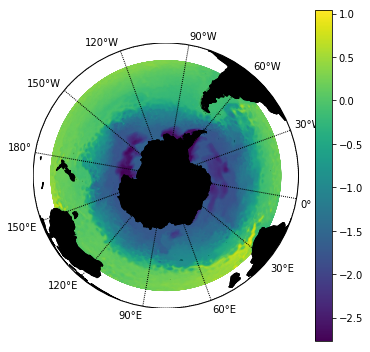

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

###########

fig = plt.figure(figsize=(5, 5),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()
quad1 = ax1.pcolormesh(lonm,latm,ssh[0,:,:],shading='gouraud')
cb1 = fig.colorbar(quad1,ax=ax1)

def init():
    quad1.set_array([])
    return quad1

def animate(iter):
    quad1.set_array(ssh[iter,:,:].ravel())
    return quad1

gs.tight_layout(fig)

anim = animation.FuncAnimation(fig,animate,frames=90,interval=100,blit=False,repeat=False)
plt.show()

In [28]:
anim

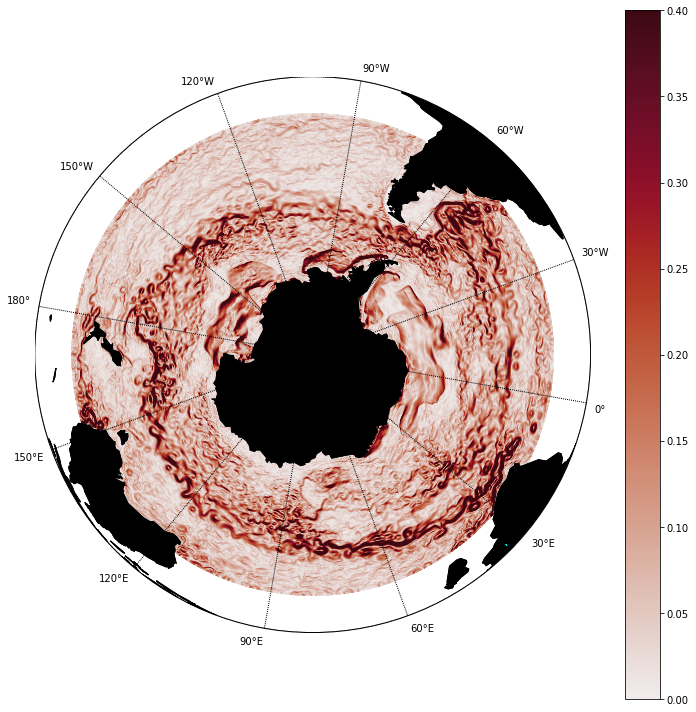

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()
quad1 = ax1.pcolormesh(lonm,latm,sqrt(u_g[0,:,:]**2+v_g[0,:,:]**2),shading='gouraud',cmap=cm.cm.amp,\
              vmin=0,vmax=0.4)
cb1 = fig.colorbar(quad1,ax=ax1)

def init():
    quad1.set_array([])
    return quad1

def animate(iter):
    quad1.set_array(sqrt(u_g[iter,:,:]**2+v_g[iter,:,:]**2).ravel())
    return quad1

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=90,interval=100,blit=False,repeat=False)
plt.show()

In [30]:
anim2